# Imports

In [1]:
# 2. Font Recognition Pipeline.ipynb
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

from pipeline_helpers import preprocess_image, segment_characters
from config.settings import DATABASE, DEBUG

/Users/yc/anaconda3/envs/Fontsfinder/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/yc/anaconda3/envs/Fontsfinder/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


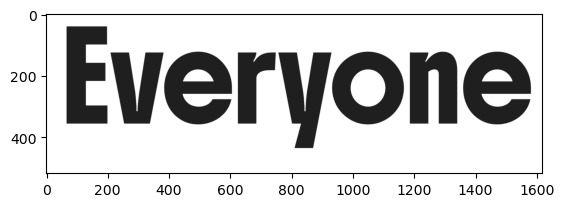

In [ ]:
import cv2
img_path = "../example_images/test.png"
img= cv2.imread(img_path)
plt.imshow(img)

In [12]:
# Example usage
img_path = "../example_images/test.png"
processed = preprocess_image(img_path)
chars = segment_characters(processed)

# Verify characters with user input
detected_text = []
for i, char_img in enumerate(chars):
    print(char_img)
    print(char_img.shape)
    plt.imshow(char_img, cmap='gray')
    plt.show()
    char = input(f"Enter character {i+1}: ")
    detected_text.append(char)

text = "".join(detected_text)
print("Detected text:", text)

error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [3]:
from pipeline_helpers import match_characters

# Then in your main processing loop:
font_scores = match_characters(chars, detected_text)

# Aggregate scores per font (average similarity)
final_scores = []
for font_id, scores in font_scores.items():
    avg_score = np.mean(scores)
    final_scores.append((font_id, avg_score))

# Sort by highest similarity
final_scores.sort(key=lambda x: x[1], reverse=True)
print("final_scores", final_scores)

final_scores [(1300, np.float32(0.47815624)), (244, np.float32(0.47115186)), (1669, np.float32(0.46968985)), (1200, np.float32(0.46569705)), (928, np.float32(0.45906088)), (1897, np.float32(0.4564674)), (609, np.float32(0.4560568)), (1355, np.float32(0.45458838)), (782, np.float32(0.454451)), (924, np.float32(0.4533416)), (1381, np.float32(0.45331958)), (851, np.float32(0.45222238)), (1541, np.float32(0.4494038)), (1856, np.float32(0.4486674)), (1181, np.float32(0.44763157)), (1272, np.float32(0.44606826)), (1570, np.float32(0.44573236)), (1665, np.float32(0.44573236)), (938, np.float32(0.44474626)), (613, np.float32(0.44466949)), (1278, np.float32(0.44420293)), (145, np.float32(0.4441754)), (797, np.float32(0.44384682)), (1320, np.float32(0.44365296)), (56, np.float32(0.44344953)), (261, np.float32(0.44333407)), (1839, np.float32(0.44148585)), (8, np.float32(0.44099855)), (262, np.float32(0.44099095)), (460, np.float32(0.44050434)), (1569, np.float32(0.43891796)), (440, np.float32(0.4

In [4]:
from db_helpers import get_fontinfo_from_id

for font_id, scores in final_scores[:3]:
    font_info = get_fontinfo_from_id(font_id)  # Get info for font with ID 1
    if font_info:
        print(f"Font Family: {font_info['family']}")
        print(f"Style: {font_info['style']}")
        print(f"Weight: {font_info['weight']}")
        print(f"File Path: {font_info['file_path']}")
    else:
        print("Font not found")

Font Family: Moirai One
Style: Regular
Weight: 400
File Path: ../db/google-fonts/moiraione/MoiraiOne-Regular.ttf
Font Family: Diplomata
Style: Regular
Weight: 400
File Path: ../db/google-fonts/diplomata/Diplomata-Regular.ttf
Font Family: Monofett
Style: Regular
Weight: 400
File Path: ../db/google-fonts/monofett/Monofett-Regular.ttf
